In [7]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import pycocotools.mask as maskapi
import pickle
import random
from PIL import Image
import scipy.misc
import os
random.seed(224)

In [8]:
dataDir='..'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [9]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.41s)
creating index...
index created!


In [10]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush



In [14]:
# get all images containing person,
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds.sort()
print (len(imgIds))
print (imgIds[:10])

2693
[139, 785, 872, 885, 1000, 1268, 1296, 1353, 1490, 1584]


In [23]:
def get_mask(imgId, idx):
    """Get mask for idx'th person in this imgId."""
    img = coco.loadImgs(imgId)[0]
    filename="%012d.jpg"%imgId
    I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
    #I = io.imread(dataDir + 'images/' + dataType +'/'+filename) #I = io.imread(img['coco_url'])
    # plt.imshow(I); plt.axis('off')

    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=False)
    anns = coco.loadAnns(annIds)
    if idx >= len(anns):
        return None, None

    ann = anns[idx]
    bb = ann['bbox']
    x1, x2, y1, y2 = [int(bb[0]), int(bb[0]+bb[2]), int(bb[1]), int(bb[1]+bb[3])]

    mask=coco.annToMask(ann)
    
    if len(I.shape) < 3:
        # Let's not worry about black and white images.
        return None, None
    img = I[y1:y2, x1:x2, :]
    mask = np.array(mask[y1:y2, x1:x2])
    return img, mask

In [36]:
def get_bbox(mask):
    rle1 = maskapi.encode(np.asfortranarray(mask))
    return maskapi.toBbox(rle1)

def get_iou(mask1, mask2):
    """Get IOU of two binary segmentation masks."""
    rle1 = maskapi.encode(np.asfortranarray(mask1))
    rle2 = maskapi.encode(np.asfortranarray(mask2))
    return maskapi.iou([rle1], [rle2], [0])[0, 0]

def show_im_and_mask(img, mask):
    """Display image and mask."""
    plt.figure()

    plt.subplot(1, 2, 1)
    plt.imshow(img)

    plt.subplot(1, 2, 2)
    plt.imshow(mask)
    plt.show()

[  0.   1. 292. 457.]


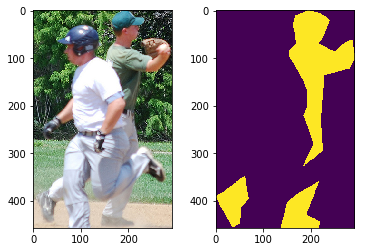

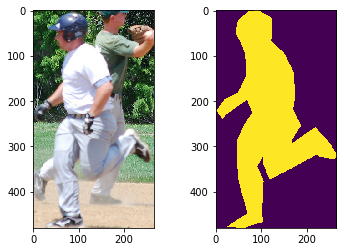

-1.0

In [37]:
img1 , mask1 = get_mask(872,0)
img2 , mask2 = get_mask(872,1)
print (get_bbox(mask1))
show_im_and_mask(img1,mask1)
show_im_and_mask(img2,mask2)
get_iou(mask1,mask2)